In [30]:
#datasets @https://finance.yahoo.com/quote/MSFT/history/

In [31]:
import pandas as pd
df=pd.read_csv("MSFT.csv")


In [32]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060055,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062199,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063272,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061663,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060591,47894400
...,...,...,...,...,...,...,...
9625,2024-05-22,430.089996,432.410004,427.130005,430.519989,430.519989,18073700
9626,2024-05-23,432.970001,433.600006,425.420013,427.000000,427.000000,17211700
9627,2024-05-24,427.190002,431.059998,424.410004,430.160004,430.160004,11845800
9628,2024-05-28,429.630005,430.820007,426.600006,430.320007,430.320007,15706000


In [33]:
df = df[['Date', 'Close']]

df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9625,2024-05-22,430.519989
9626,2024-05-23,427.000000
9627,2024-05-24,430.160004
9628,2024-05-28,430.320007


In [34]:
df['Date']

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9625    2024-05-22
9626    2024-05-23
9627    2024-05-24
9628    2024-05-28
9629    2024-05-29
Name: Date, Length: 9630, dtype: object

In [35]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9625,2024-05-22,430.519989
9626,2024-05-23,427.000000
9627,2024-05-24,430.160004
9628,2024-05-28,430.320007


In [36]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-36-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9625   2024-05-22
9626   2024-05-23
9627   2024-05-24
9628   2024-05-28
9629   2024-05-29
Name: Date, Length: 9630, dtype: datetime64[ns]

In [37]:
df.index = df.pop('Date')

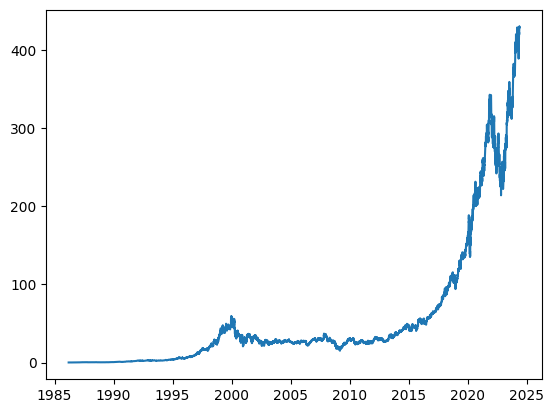

In [38]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [39]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2021-03-25',
                                '2024-05-29',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,237.580002,235.460007,232.339996,236.479996
2,2021-03-29,235.460007,232.339996,236.479996,235.240005
3,2021-03-30,232.339996,236.479996,235.240005,231.850006
4,2021-03-31,236.479996,235.240005,231.850006,235.770004
...,...,...,...,...,...
795,2024-05-22,420.209991,425.339996,429.040009,430.519989
796,2024-05-23,425.339996,429.040009,430.519989,427.000000
797,2024-05-24,429.040009,430.519989,427.000000,430.160004
798,2024-05-28,430.519989,427.000000,430.160004,430.320007


In [40]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((800,), (800, 3, 1), (800,))

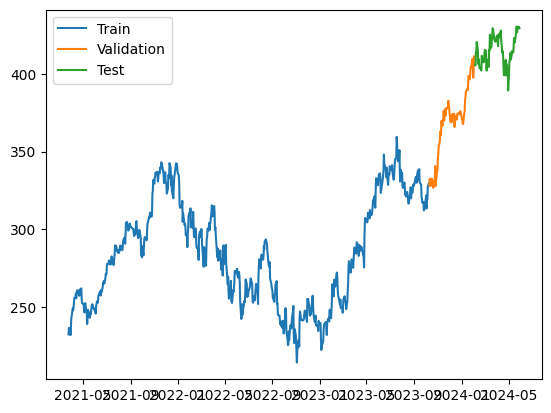

In [41]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [42]:
!pip install tensorflow as tf

ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
20/20 [==============================] - 3s 37ms/step - loss: 82215.9922 - mean_absolute_error: 284.7610 - val_loss: 136394.6562 - val_mean_absolute_error: 368.6243
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 81941.9609 - mean_absolute_error: 284.2791 - val_loss: 136039.2812 - val_mean_absolute_error: 368.1422
Epoch 3/100
20/20 [==============================] - 0s 7ms/step - loss: 81641.4766 - mean_absolute_error: 283.7508 - val_loss: 135607.2812 - val_mean_absolute_error: 367.5549
Epoch 4/100
20/20 [==============================] - 0s 6ms/step - loss: 81198.5391 - mean_absolute_error: 282.9704 - val_loss: 134791.3281 - val_mean_absolute_error: 366.4432
Epoch 5/100
20/20 [==============================] - 0s 6ms/step - loss: 80187.4219 - mean_absolute_error: 281.1760 - val_loss: 132853.6250 - val_mean_absolute_error: 363.7899
Epoch 6/100
20/20 [==============================] - 0s 7ms/step - loss: 78169.4531 - mean_absolute_error: 277.5652 - v

20/20 [==============================] - 1s 2ms/step


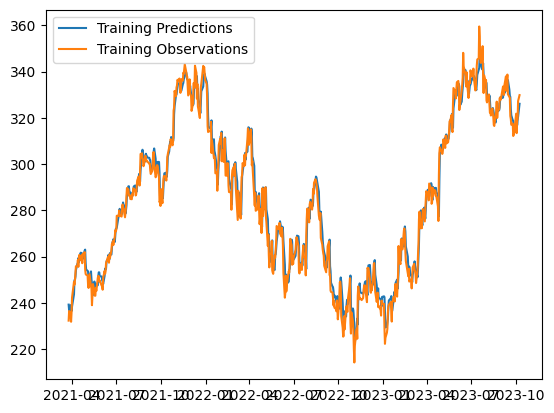

In [44]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

3/3 [==============================] - 1s 5ms/step


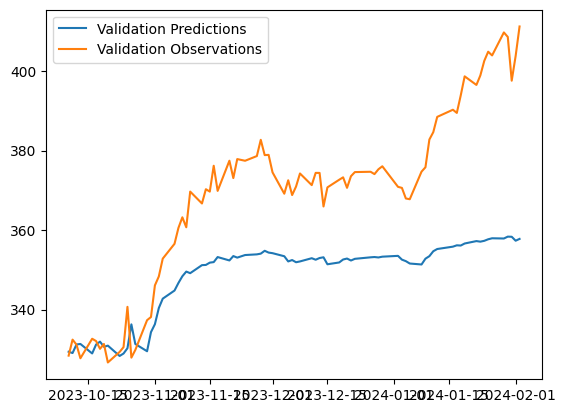

In [45]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

3/3 [==============================] - 0s 5ms/step


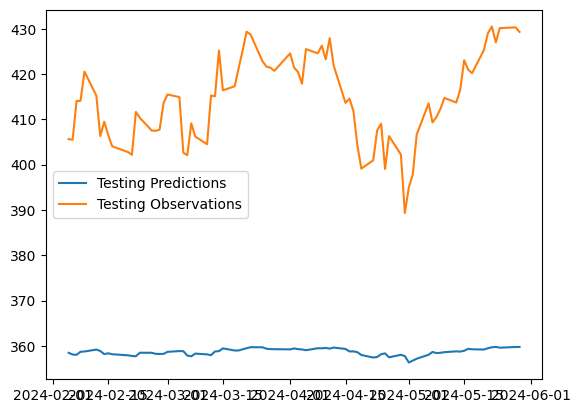

In [53]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions','Testing Observations'])

In [55]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 61ms/step


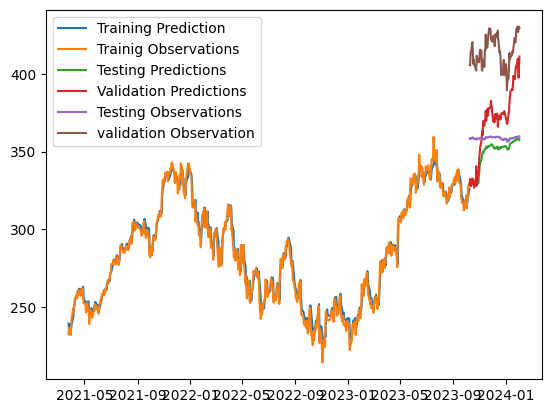

In [57]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_val, test_predictions)
plt.plot(dates_val, y_test)
plt.legend(['Training Prediction',
            'Trainig Observations',
            'Testing Predictions',
            'Validation Predictions',
            'Testing Observations',
            'validation Observation'])